## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras
from sklearn import preprocessing
# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    #min_max_scaler = preprocessing.MinMaxScaler(feature_range = (-1,1))
    #x = min_max_scaler.fit_transform(x)
    x = (x-x.mean())/(x.max()-x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x
def preproc_y(y, num_classes=10):
    if y.shape[-1]==1:
        y= keras.utils.to_categorical(y, num_classes)
    return y

In [20]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units = 10, num_neurons=[512,256,128]):
    input_layer= keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units= n_units, activation= 'relu', name= 'hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units= n_units, activation= 'relu', name= 'hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units = output_units, activation='softmax', name='output')(x)
    model = keras.models.Model(inputs = [input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
print (x_train.shape[-1])
print (x_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
3072
(3072,)


In [22]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [23]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [24]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W1012 21:16:08.983575  1364 deprecation.py:323] From C:\Users\HAO\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1012 21:16:09.067147  1364 deprecation_wrapper.py:119] From C:\Users\HAO\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 342us/step - loss: 1.6501 - acc: 0.4164 - val_loss: 1.5015 - val_acc: 0.4689
Epoch 2/100
50000/50000 [==============================] - 18s 366us/step - loss: 1.4142 - acc: 0.5046 - val_loss: 1.4054 - val_acc: 0.5058
Epoch 3/100
50000/50000 [==============================] - 20s 405us/step - loss: 1.2953 - acc: 0.5435 - val_loss: 1.3834 - val_acc: 0.5156
Epoch 4/100
50000/50000 [==============================] - 19s 388us/step - loss: 1.1909 - acc: 0.5836 - val_loss: 1.3500 - val_acc: 0.5237
Epoch 5/100
50000/50000 [==============================] - 17s 334us/step - loss: 1.1053 - acc: 0.6138 - val_loss: 1.3363 - val_acc: 0.5346
Epoch 6/100
50000/50000 [==============================] - 17s 342us/step - loss: 1.0226 - acc: 0.6400 - val_loss: 1.3308 - val_acc: 0.5490
Epoch 7/100
50000/50000 [==============================] - 18s 359us/step - loss: 0.9376 - acc: 0.6708 - val_l

50000/50000 [==============================] - 19s 378us/step - loss: 0.0728 - acc: 0.9758 - val_loss: 3.9302 - val_acc: 0.5386
Epoch 59/100
50000/50000 [==============================] - 15s 302us/step - loss: 0.0890 - acc: 0.9722 - val_loss: 3.9680 - val_acc: 0.5361
Epoch 60/100
50000/50000 [==============================] - 18s 352us/step - loss: 0.1025 - acc: 0.9663 - val_loss: 3.8944 - val_acc: 0.5334
Epoch 61/100
50000/50000 [==============================] - 17s 339us/step - loss: 0.0641 - acc: 0.9793 - val_loss: 3.8981 - val_acc: 0.5414
Epoch 62/100
50000/50000 [==============================] - 15s 295us/step - loss: 0.0702 - acc: 0.9772 - val_loss: 3.9073 - val_acc: 0.5331
Epoch 63/100
50000/50000 [==============================] - 16s 314us/step - loss: 0.0943 - acc: 0.9704 - val_loss: 3.9306 - val_acc: 0.5367
Epoch 64/100
50000/50000 [==============================] - 20s 405us/step - loss: 0.0716 - acc: 0.9767 - val_loss: 3.9842 - val_acc: 0.5370
Epoch 65/100
50000/50000 [

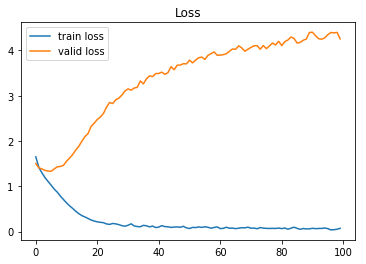

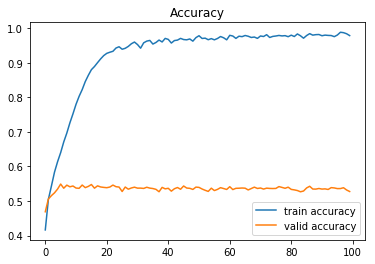

In [26]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()